In [145]:
BASE_DIR = '../'*3
MODEL_DIR = BASE_DIR + 'code/ETC/autoencoder/autoencoder.ipynb'
DATA_DIR =BASE_DIR+ 'code/ETC/autoencoder/dataset_auto_mnist.ipynb'

In [146]:
%run {MODEL_DIR}
%run {DATA_DIR}

Using device: cpu
Using PyTorch version: 1.9.0


In [198]:
EPOCH = 10
BATCH_SIZE=20
NUM_WORKERS=0
LEARNING_RATE = 0.001

In [163]:
mset_all = MnistAutoDataset(train_ratio = 1.00)
mset_1p = MnistAutoDataset(train_ratio = 0.01)

Model mnist_mlp_all train started 


!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
    Epoch 1: cost=9.640, accuracy=0.821/0.800 (18/18 secs)
    Epoch 1: cost=9.524, accuracy=0.842/0.900 (17/35 secs)
    Epoch 2: cost=8.754, accuracy=0.880/0.900 (24/59 secs)
    Epoch 2: cost=9.091, accuracy=0.879/1.000 (18/77 secs)
    Epoch 3: cost=8.880, accuracy=0.883/0.600 (25/102 secs)
    Epoch 3: cost=9.064, accuracy=0.882/0.800 (26/128 secs)
    Epoch 4: cost=8.594, accuracy=0.890/0.900 (24/152 secs)
    Epoch 4: cost=8.985, accuracy=0.885/0.900 (18/170 secs)
    Epoch 5: cost=9.030, accuracy=0.883/1.000 (24/194 secs)
    Epoch 5: cost=9.181, accuracy=0.884/0.700 (15/209 secs)
    Epoch 6: cost=9.162, accuracy=0.886/0.900 (20/229 secs

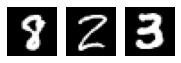

In [46]:
conf_mlp =[['full',{'width':10}]]
mnist_mlp_all = RnnExtModel('mnist_mlp_all',mset_all,conf_mlp)
mnist_mlp_all.exec_all(epoch_count = 10, report=2)

Model mnist_mlp_1p train started 


[[Linear(in_features=784, out_features=10, bias=True)]]
!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
    Epoch 2: cost=66.734, accuracy=0.153/0.234 (1/1 secs)
    Epoch 4: cost=35.590, accuracy=0.334/0.383 (0/1 secs)
    Epoch 6: cost=19.080, accuracy=0.529/0.508 (0/1 secs)
    Epoch 8: cost=12.904, accuracy=0.660/0.582 (0/1 secs)
    Epoch 10: cost=8.650, accuracy=0.765/0.633 (0/1 secs)
Model mnist_mlp_1p train ended in 1 secs:
Model mnist_mlp_1p test report: accuracy = 0.686, (0 secs)

Model mnist_mlp_1p Visualization
정답 tensor([3, 7, 6]) vs. 추정 tensor([8, 4, 6])


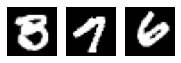

In [199]:
conf_mlp =[['full',{'width':10}]]
mnist_mlp_1p = RnnExtModel('mnist_mlp_1p',mset_1p,conf_mlp)
mnist_mlp_1p.exec_all(epoch_count = 10, report=2, batch_size=BATCH_SIZE, learning_rate = LEARNING_RATE)

Model mnist_auto_1autoencode started:
    Epoch 1: cost=2789.255, accuracy=-0.583/-0.583 (27/27 secs)
    Epoch 2: cost=2541.529, accuracy=-0.518/-0.518 (30/57 secs)
    Epoch 3: cost=2534.787, accuracy=-0.515/-0.515 (29/86 secs)
    Epoch 4: cost=2528.522, accuracy=-0.514/-0.514 (30/116 secs)
    Epoch 5: cost=2512.925, accuracy=-0.509/-0.509 (29/145 secs)
    Epoch 6: cost=2506.865, accuracy=-0.507/-0.507 (29/174 secs)
    Epoch 7: cost=2505.195, accuracy=-0.506/-0.506 (30/204 secs)
    Epoch 8: cost=2504.282, accuracy=-0.506/-0.506 (30/234 secs)
    Epoch 9: cost=2503.317, accuracy=-0.506/-0.506 (29/263 secs)
    Epoch 10: cost=2503.049, accuracy=-0.506/-0.506 (30/293 secs)
Model mnist_auto_1 autoencode ended in 293 secs :
Model mnist_auto_1 train started 


[False, Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (ReLU): LeakyReLU(negative_slope=0.01)
), Linear(in_features=10, out_features=10, bias=True)]
!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (enco

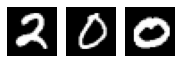

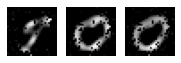

In [164]:
conf_auto ={
    'encoder':[['full',{'width':10}]],
    'decoder':[['full',{'width':784}]],
    'supervised':[['full',{'width':10}]]
}

mnist_auto_1 = Autoencoder('mnist_auto_1', mset_1p, conf_auto)
mnist_auto_1.autoencode(epoch_count = 10, report=1, learning_rate = LEARNING_RATE, batch_size=BATCH_SIZE)
mnist_auto_1.exec_all(epoch_count=10, report=1,learning_rate = LEARNING_RATE, batch_size=BATCH_SIZE)